# Prediction using Supervised Machine Learning
(Level - Beginner)

- Predict the percentage of a student based on the no. of study hours.
- This is a simple linear regression task as it involves just 2 variables.
- You can use R, Python SAS Enterprise Miner or any other tool
- Data can be found at http://bit.ly/w-data
- What will be the predicted score if a student studies for 9.25 hrs/day?

### Author: JoevinMaderal

In [1]:
#Import all library requirements for this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on a scatter plot to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

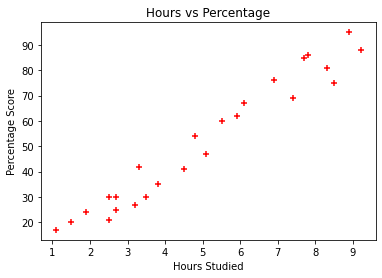

In [3]:
# Plotting the distribution of scores
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.scatter(df.Hours, df.Scores, color="red", marker='+')

**From the graph above, we can clearly see that there is a POSITIVE LINEAR RELATION between the number of hours studied and percentage of score and is suitable for a Linear regression model.**

# **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
df.shape

(25, 2)

Split this data into training and test sets. 

In [6]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [7]:
train.shape

(17, 2)

In [8]:
test.shape

(8, 2)

In [9]:
X_train=train.drop("Scores",axis=1)
y_train=train["Scores"]

In [10]:
X_test=test.drop("Scores",axis=1)
y_test=test["Scores"]

# **Training the Algorithm**

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
lr.coef_

array([9.71054094])

In [14]:
lr.intercept_

2.794196676599803

In [15]:
h = [5]
lr.predict([h])

C:\Users\ousam\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51.34690136])

# Linear equation slope intercept form
# y = mx + b

- m = slope or lr.coef_
- x = hours
- b = y intercept or lr.intercept_

In [16]:
9.71054094 * 5 + 2.794196676599803

51.3469013765998

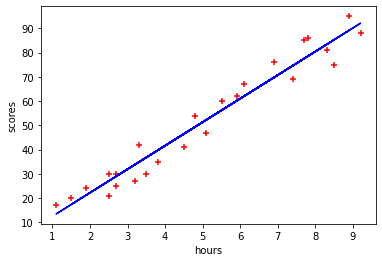

In [17]:
# Plotting the regression line # formula for line is y=m*x + c
plt.xlabel('hours')
plt.ylabel('scores')
plt.scatter(df.Hours, df.Scores, color = 'red', marker = '+')
plt.plot(df.Hours, lr.predict(df[['Hours']]), color = 'blue')

# Making predictions

In [18]:
pr = lr.predict(X_test)

In [19]:
list(zip(y_test,pr))

[(81, 83.39168644881056),
 (30, 27.07054901762714),
 (21, 27.07054901762714),
 (76, 69.79692913783526),
 (62, 60.08638820142432),
 (25, 29.012657204909328),
 (42, 34.838981766755886),
 (47, 52.317955452295564)]

# Evaluate the model

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error(y_test,pr,squared=False)

4.859985351228103

# Solution

In [22]:
hour =[9.25]
own_pr=lr.predict([hour])
print("No of Hours = {}".format([hour]))
print("Predicted Score = {}".format(own_pr[0]))

No of Hours = [[9.25]]
Predicted Score = 92.61670033840096


C:\Users\ousam\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
